In [82]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from custom_mpl_settings import load_mpl_rc
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()


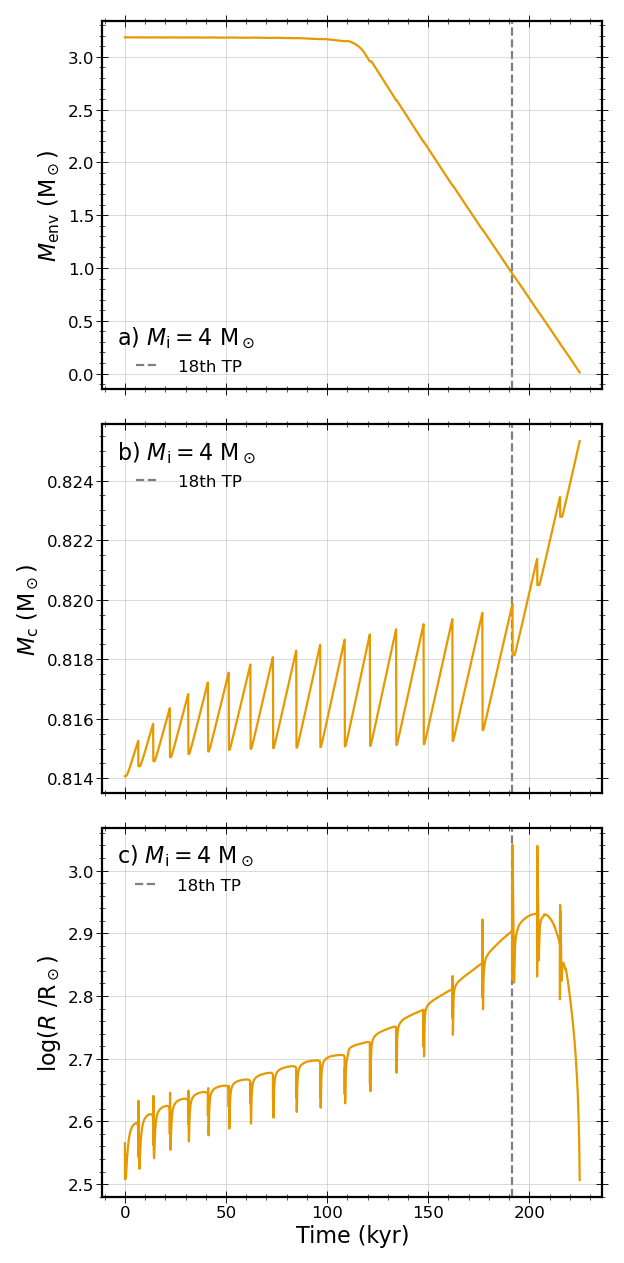

In [83]:
def combine_hist(quantity):
    m1 = mp.MESA()
    m2 = mp.MESA()
    m1.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/4.0/LOGS_TPAGB_FeI')
    m2.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/4.0/LOGS_TPAGB_prevent_FeI')
    return np.concatenate((m1.hist[quantity][m1.hist.model_number<m2.hist.model_number[0]],m2.hist[quantity]))

instability = np.where(combine_hist('TP_count')==18)[0][0]

fig,ax=plt.subplots(3,1,figsize=(8,16),sharex=True)
ax[0].plot(combine_hist('star_age')/1e3,combine_hist('star_mass')-combine_hist('he_core_mass'))
ax[1].plot(combine_hist('star_age')/1e3,combine_hist('he_core_mass'))
ax[2].plot(combine_hist('star_age')/1e3,combine_hist('log_R'))
ax[0].axvline(combine_hist('star_age')[instability]/1e3,ls='--',c='black',label='18th TP',alpha=0.5,zorder=0)
ax[1].axvline(combine_hist('star_age')[instability]/1e3,ls='--',c='black',label='18th TP',alpha=0.5,zorder=0)
ax[2].axvline(combine_hist('star_age')[instability]/1e3,ls='--',c='black',label='18th TP',alpha=0.5,zorder=0)
ax[2].set(xlabel='Time (kyr)')
ax[2].set(ylabel='$\log(R~/\mathrm{R}_\odot)$')
ax[1].set(ylabel='$M_\mathrm{c}~(\mathrm{M}_\odot)$')
ax[0].set(ylabel='$M_\mathrm{env}~(\mathrm{M}_\odot)$')
ax[0].legend(title='a) $M_\mathrm{i}=4~\mathrm{M}_\odot$',frameon=False)
ax[1].legend(title='b) $M_\mathrm{i}=4~\mathrm{M}_\odot$',frameon=False)
ax[2].legend(title='c) $M_\mathrm{i}=4~\mathrm{M}_\odot$',frameon=False)
fig.tight_layout()
plt.savefig('plots/4M_all_TPs.jpeg',dpi=200)
plt.show()


lambda max =  0.8084805468877546


670196.5472363946

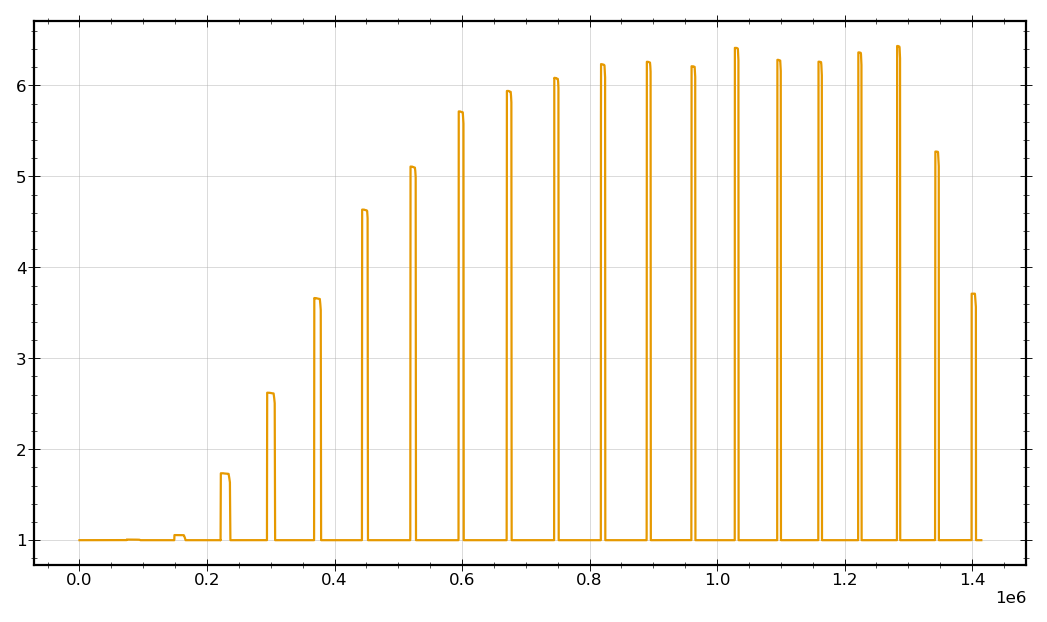

In [219]:
m.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB')
plt.plot(m.hist.star_age,10**m.hist.lambda_DUP)
lambda_max =  np.max(m.hist.lambda_DUP)
print('lambda max = ',lambda_max)
m.hist.star_age[np.where(m.hist.lambda_DUP>0.95*lambda_max)[0][0]]

In [283]:
from scipy.signal import argrelextrema

df_TPs = pd.DataFrame()
hist = m.hist
for NTP in np.unique(hist.TP_count):
    sec = np.where(m.hist.TP_count==NTP)[0]
    TP_dict = {
        'initial_mass':[round(m.hist.star_mass[0],2)],
        'NTP':[NTP],
        'he_core_mass':[hist.he_core_mass[sec][0]],
        'co_core_mass':[hist.co_core_mass[sec][0]],
        'envelope_mass':[hist.star_mass[sec][0]-hist.he_core_mass[0]],
        'interpulse_period':[hist.star_age[sec][-1]-hist.star_age[sec][0]],
        'lambda_TDU':[hist.lambda_DUP[sec].max()],
        'central_degeneracy':[hist.central_degeneracy[sec][0]],
        'LHe_peak':[hist.log_LHe[sec].max()],
        }
    
    logR = m.hist.log_R[sec]
    mod_num = m.hist.model_number[sec]
    max_and_min = np.sort(np.append(argrelextrema(logR, np.greater)[0],argrelextrema(logR, np.less)[0]))
    max_and_min = np.append(max_and_min[0],max_and_min[np.where(np.diff(max_and_min)>len(sec)/50)[0]+1])
    sample_points = np.around(np.linspace(0,len(sec)-1,30-len(max_and_min))).astype(int)
    for i, sample_point in enumerate(np.sort(np.append(max_and_min,sample_points))):
        TP_dict = {
            **TP_dict,
            f'star_age_{i}':hist.star_age[sec][sample_point],
            f'log_R_{i}':hist.log_R[sec][sample_point],
            f'log_L_{i}':hist.log_L[sec][sample_point],
            f'log_Teff_{i}':hist.log_Teff[sec][sample_point],
        }

    
    df_TPs = pd.concat([df_TPs, pd.DataFrame(TP_dict)])

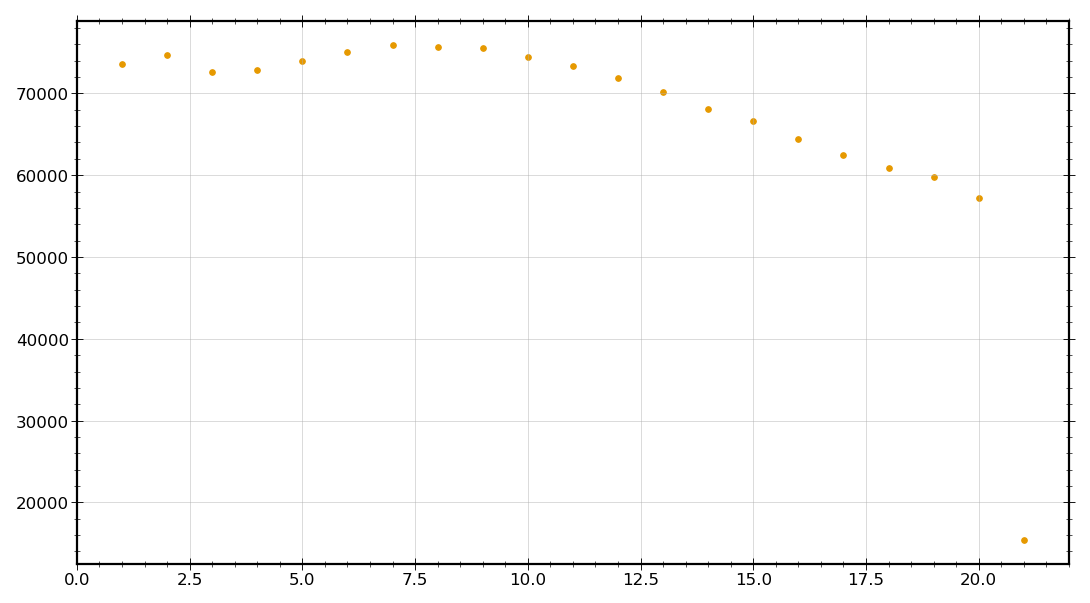

In [278]:
plt.scatter(df_TPs['NTP'],df_TPs['interpulse_period'])

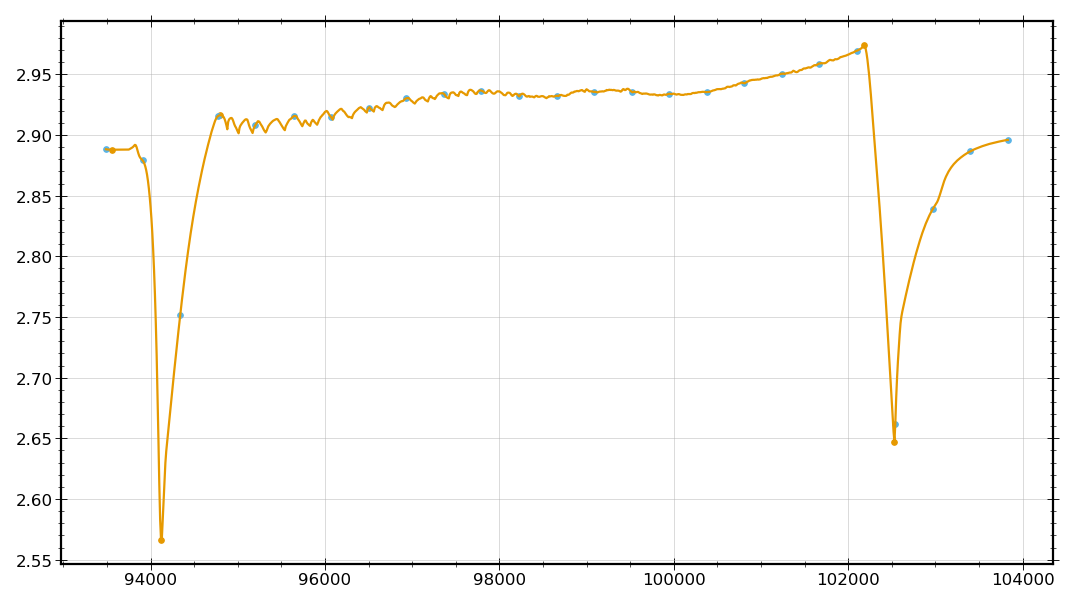

In [268]:
from scipy.signal import argrelextrema


NTP= 21
sec = np.where(m.hist.TP_count==NTP)[0]
logR = m.hist.log_R[sec]
mod_num = m.hist.model_number[sec]
plt.plot(mod_num,logR)
max_and_min = np.sort(np.append(argrelextrema(logR, np.greater)[0],argrelextrema(logR, np.less)[0]))
max_and_min = np.append(max_and_min[0],max_and_min[np.where(np.diff(max_and_min)>len(sec)/50)[0]+1])
plt.scatter(mod_num[max_and_min],logR[max_and_min])
sample_points = np.around(np.linspace(0,len(sec)-1,30-len(max_and_min))).astype(int)
plt.scatter(mod_num[sample_points],logR[sample_points])

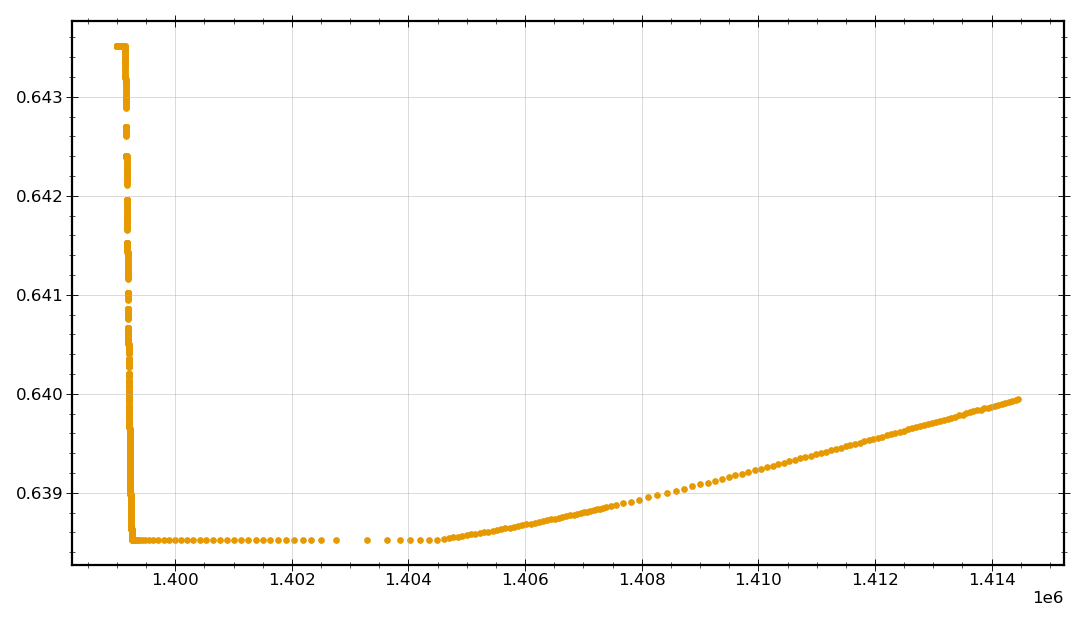

In [288]:
plt.scatter(m.hist.star_age[sec],m.hist.he_core_mass[sec])

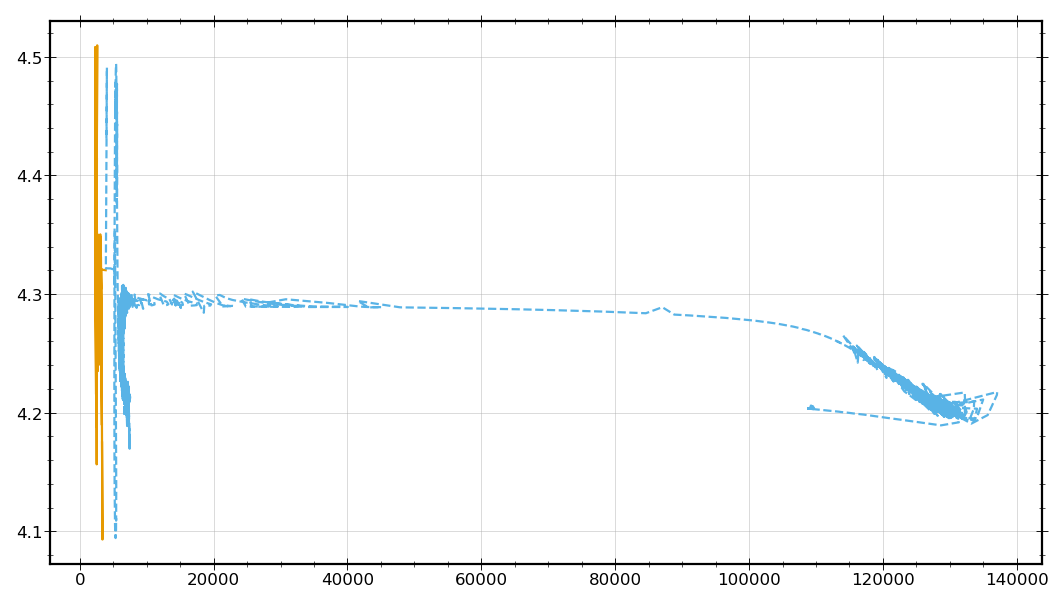

In [35]:
m.loadHistory('/Users/natalierees/post_agb_grid_23051/Z0.014/4.0/LOGS_postAGB')
plt.plot(10**combine_hist('log_Teff'),combine_hist('log_L'))
plt.plot(10**m.hist.log_Teff,m.hist.log_L)

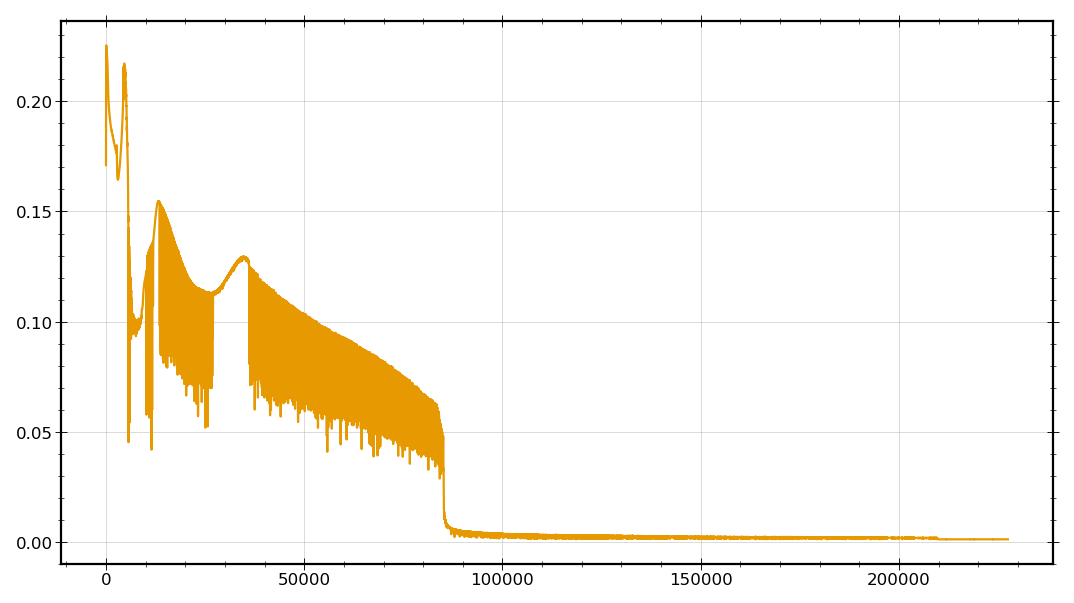

In [62]:
m.loadHistory('/Users/natalierees/post_agb_grid_23051/Z0.014/4.0/LOGS_postAGB')
plt.plot(m.hist.model_number,m.hist.min_beta)

/Users/natalierees/post_agb_grid_23051/Z0.014/4.0/LOGS_postAGB/profile24.data


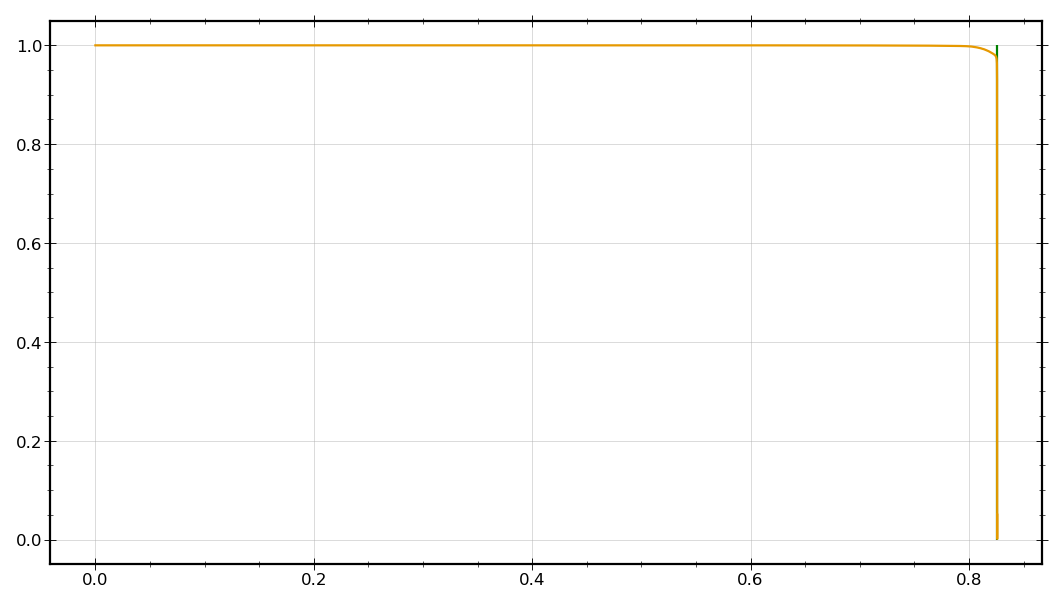

In [58]:
m.loadProfile('/Users/natalierees/post_agb_grid_23051/Z0.014/4.0/LOGS_postAGB',prof=24)
plt.plot(m.prof.mass,m.prof.beta)
plt.vlines(m.prof.he_core_mass,0,1)
